### **Data Description**

'**Student Performance Data**' Dataset provides information about 2392 school students with their details.
- ***StudentID***, a unique identifier for each student.
- ***Age***, the age of the students, ranging from 15 to 18.
- ***Gender***, represents the gender of the students (0: Male, 1: Female).
- ***Ethnicity***, refers to the ethnicity of the students (0: Caucasian, 1: African American, 2: Asian, 3: Other).
- ***Study Time Weekly***, shows the students' weekly study time (in hours, 0-20).
- ***Absences***, number of absences during the school year (0-30).
- ***Tutoring***, indicates whether the student receives tutoring (0: No, 1: Yes).
- ***Parental Education***, represents the education level of the parents (0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher).
- ***Parental Support***, shows the level of parental support (0: None, 1: Low, 2: Moderate, 3: High, 4: Very High).
- ***Extracurricular***, participation in extracurricular activities (0: No, 1: Yes).
- ***Sports***, participation in sport activities (0: No, 1: Yes).
- ***Music***, participation in music activities (0: No, 1: Yes).
- ***Volunteering***, participation in volunteering activities (0: No, 1: Yes).
- ***GPA***, Grade Point Average (2.0 - 4.0).
- ***Grade Class***, classification of students' grades based on their GPA ('A': GPA >= 3.5, 'B': 3.0 <= GPA < 3.5, 'C': 2.5 <= GPA < 3.0, 'D': 2.0 <= GPA < 2.5, 'F': GPA < 2.0)

### **Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

### **Read Dataset**

In [ ]:
df = pd.read_csv("Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### **Data Exploration and Preprocessing**

#### **Explore Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


#### **Drop Unnecessary Columns**

In [ ]:
df = df.drop(columns = ['StudentID'])
df = df.drop(columns = ['GradeClass'])

In the code above, we remove the *StudentID* column, as it is unnecessary for the machine learning process. We also remove the *GradeClass* column, because we will be recalculating the classes on the Feature Engineering process.

#### **Check Unique Values from Each Columns**

In [ ]:
for i in df.columns:
    print(f"{df[i].value_counts()} \n")

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64 

Gender
1    1222
0    1170
Name: count, dtype: int64 

Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64 

ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64 

StudyTimeWeekly
19.833723    1
16.082185    1
2.543624     1
7.971184     1
3.403053     1
            ..
18.116988    1
10.324956    1
3.074986     1
18.434533    1
17.819907    1
Name: count, Length: 2392, dtype: int64 

Absences
25    93
13    93
12    92
8     91
19    90
20    90
6     88
15    87
23    86
7     86
1     85
27    84
14    84
5     83
21    83
17    81
24    81
26    80
3     79
16    79
18    79
11    71
22    71
2     69
29    69
4     69
0     67
9     67
10    61
28    54
Name: count, dtype: int64 

Tutoring
0    1671
1     721
Name: count, dtype: int64 

ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64 

Extracurricular
0    1475
1 

Based on the code above, it is known that *Age*, *StudyTimeWeekly*, *Absences*, and *GPA* are numerical columns, while *Gender*, *Ethnicity*, *ParentalEducation*, *Tutoring*, *ParentalSupport*, *Extracurricular*, *Sports*, *Music*, and *Volunteering* are categorical columns.  

#### **Divide Categorical and Numerical Columns**

In [ ]:
cat_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
num_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

print(f"Categorical: {cat_cols}")
print(f"Numerical: {num_cols}")

Categorical: ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
Numerical: ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']


#### **Handle Duplicates**

In [ ]:
df.\
  duplicated().\
  sum()

0

Since there aren't any duplicates, additional handling for duplicate values is unnecessary.

#### **Handle Missing Values**

In [ ]:
df.\
  isnull().\
  sum()

,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0
Sports,0


There are no missing values, hence additional handling is unnecessary.

#### **Check Distributions**

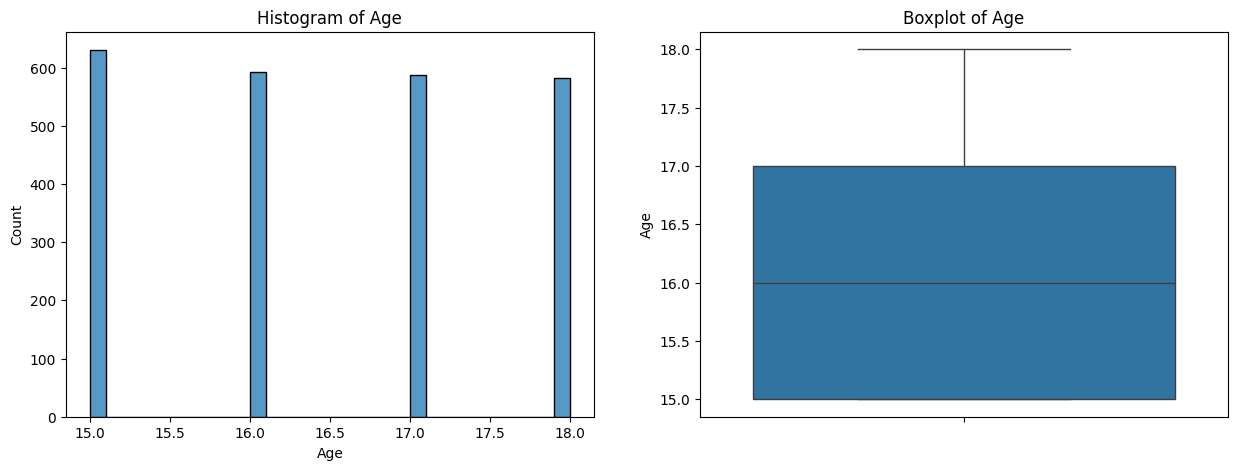

Age:
ShapiroResult(statistic=0.854282164501672, pvalue=1.8113924197582927e-42)


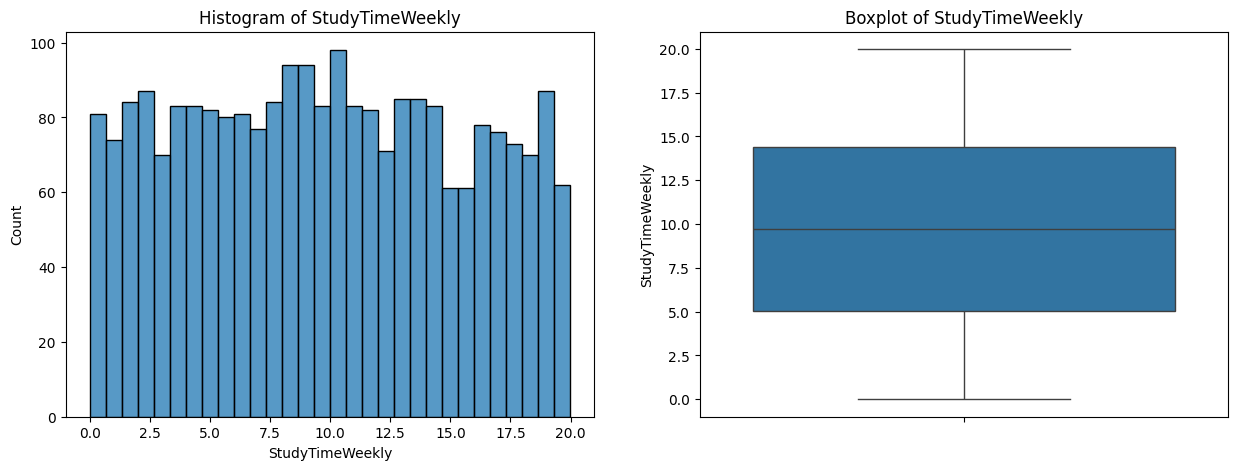

StudyTimeWeekly:
ShapiroResult(statistic=0.959990052063945, pvalue=3.59350602668213e-25)


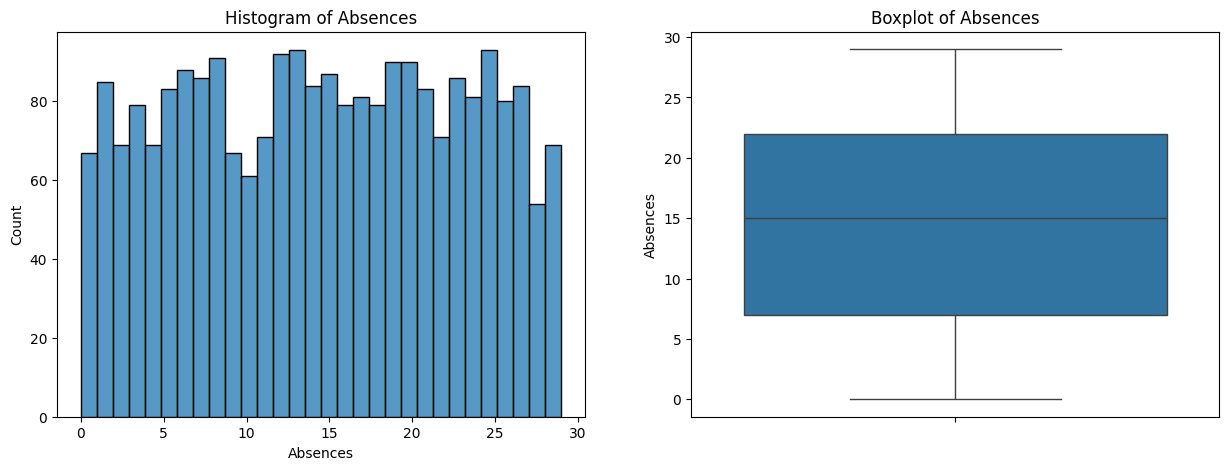

Absences:
ShapiroResult(statistic=0.9556810349498003, pvalue=2.2840697519084585e-26)


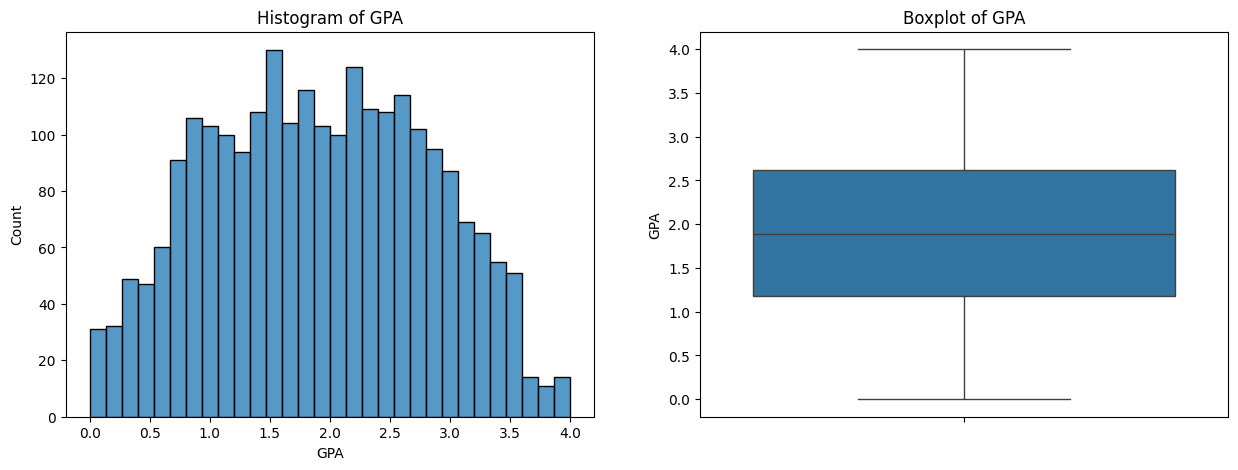

GPA:
ShapiroResult(statistic=0.9838187150154397, pvalue=7.294327280605808e-16)


In [ ]:
def check_dist(data, cols):
    for col in cols:
        plt.figure(figsize = (15, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(data[col],
                     bins = 30)
        plt.title(f"Histogram of {col}")

        plt.subplot(1, 2, 2)
        sns.boxplot(y = data[col])
        plt.title(f"Boxplot of {col}")

        plt.show()

        print(f"{col}:\n{shapiro(data[col])}")

check_dist(df, num_cols)

Based on the plots above, there are no outliers detected, so additional handling is not needed.  
Additionally, if we looked through the plots, *Age*, *StudyTimeWeekly* and *Absences* have uniform distributions, while *GPA* has a normal distribution.

#### **Feature Engineering: Grade Class**

In [ ]:
def recode_grade(score):
    if score >= 3.5:
        return 'A'
    elif score >= 3.0:
        return 'B'
    elif score >= 2.5:
        return 'C'
    elif score >= 2.0:
        return 'D'
    else:
        return 'F'

df['GradeClass'] = df['GPA'].apply(recode_grade)
df.head(5)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,C
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,B
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,F
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,D
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,F


In the code above, we transform the *GradeClass* column as a categorized class based on the student's GPA, and we will be using this variable as our output variable (y-variable).

#### **Check Variables' Correlation with Y Variable**

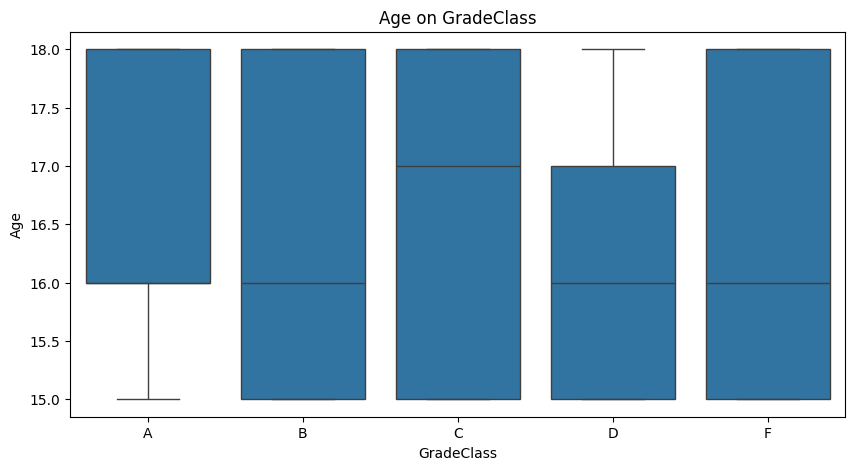

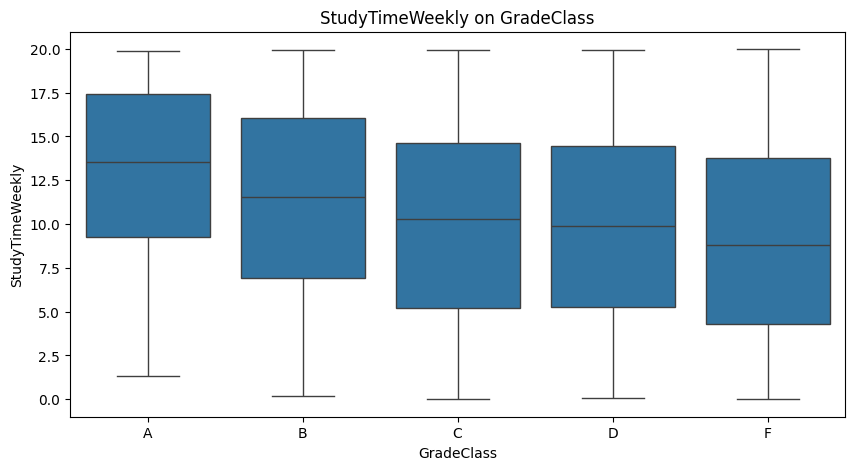

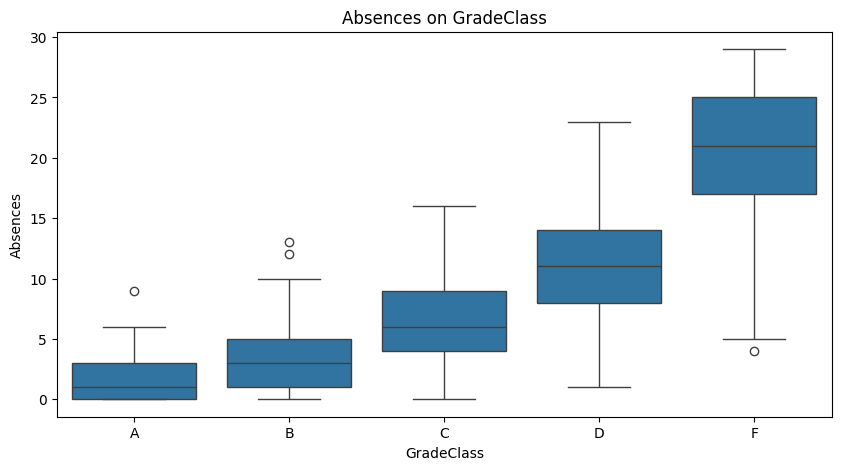

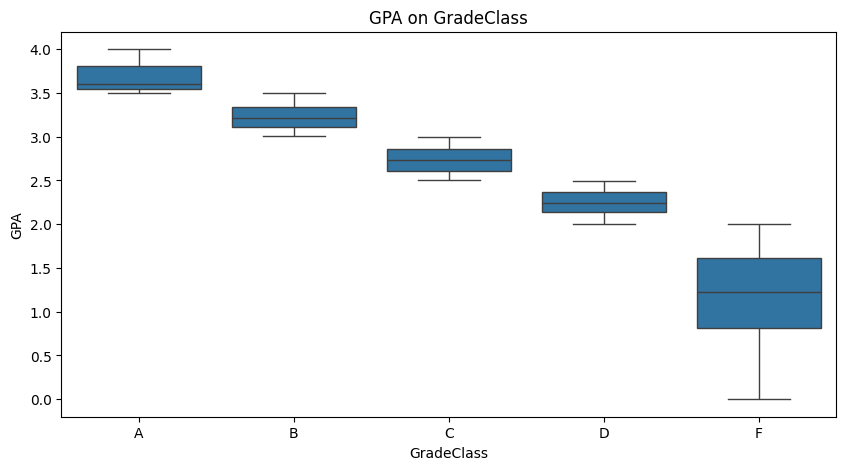

In [ ]:
def check_numcols_with_Y(data, cols, target, target_order):
    for col in cols:
        plt.figure(figsize = (10, 5))

        sns.boxplot(x = data[target],
                    y = data[col],
                    order = target_order)
        plt.title(f"{col} on {target}")

        plt.show()

check_numcols_with_Y(df,
                     num_cols,
                     'GradeClass',
                     target_order=['A', 'B', 'C', 'D', 'F'])

Based on the plots above, it can be concluded that *StudyTimeWeekly*, *Absences*, and *GPA* are correlated with the y-variable.

<Figure size 1000x500 with 0 Axes>

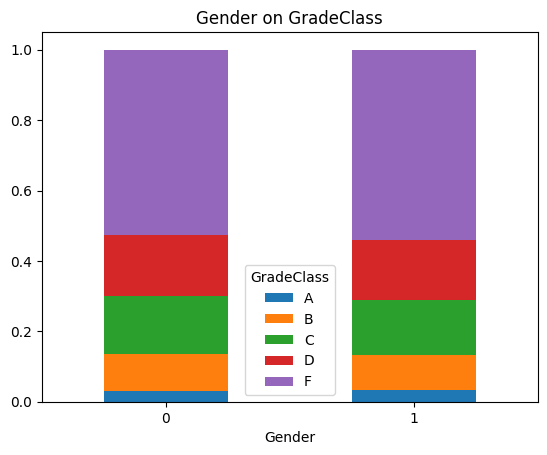

<Figure size 1000x500 with 0 Axes>

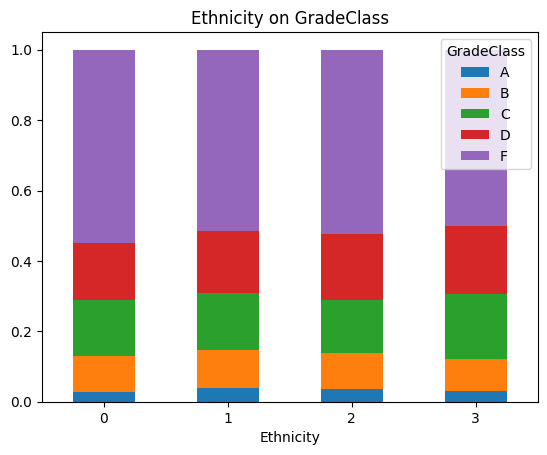

<Figure size 1000x500 with 0 Axes>

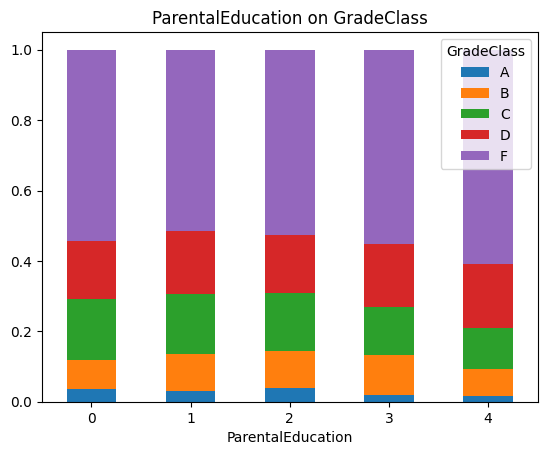

<Figure size 1000x500 with 0 Axes>

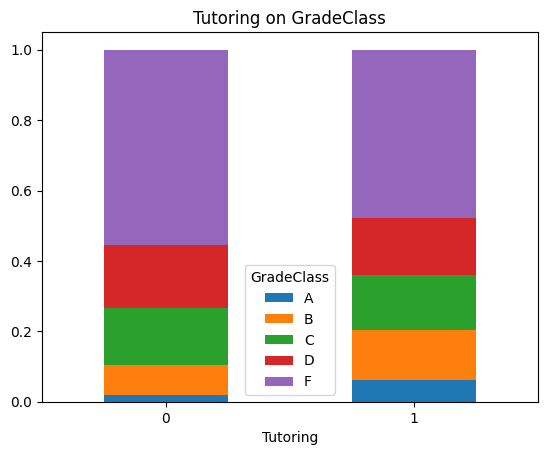

<Figure size 1000x500 with 0 Axes>

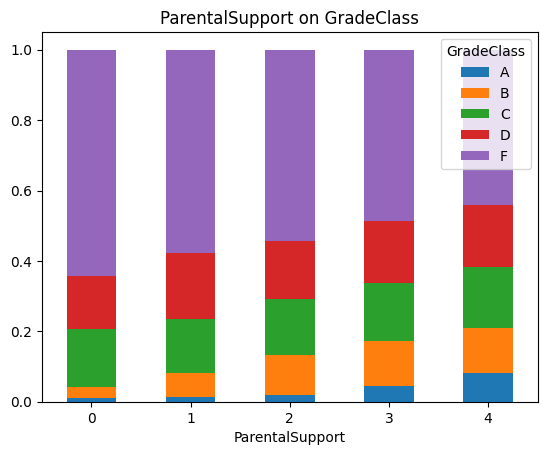

<Figure size 1000x500 with 0 Axes>

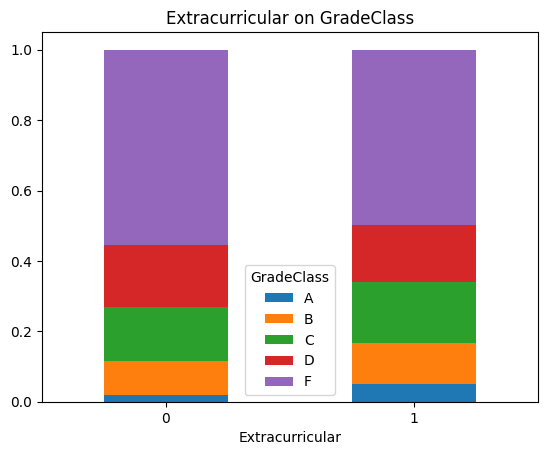

<Figure size 1000x500 with 0 Axes>

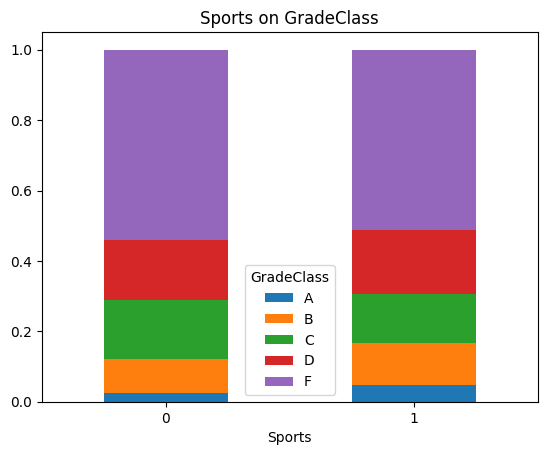

<Figure size 1000x500 with 0 Axes>

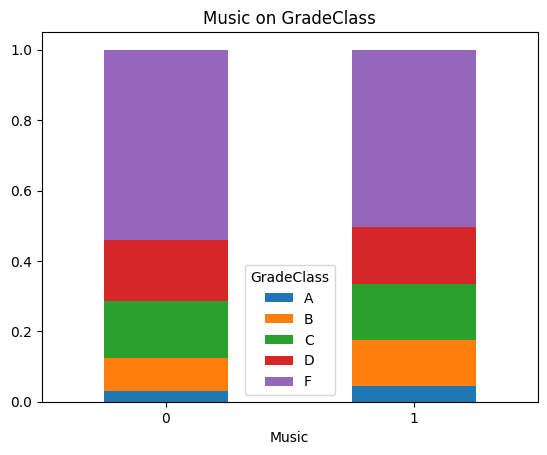

<Figure size 1000x500 with 0 Axes>

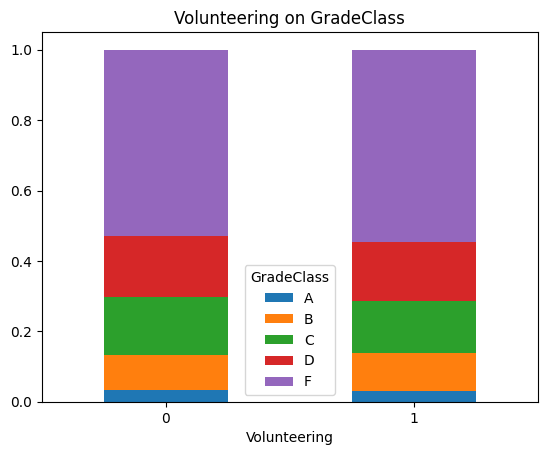

In [ ]:
def check_catcols_with_Y(data, cols, target):
    for col in cols:
        plt.figure(figsize = (10, 5))

        data.groupby(col)[target].\
          value_counts(normalize = True).\
          unstack(target).\
          plot.\
          bar(stacked = True)
        plt.title(f"{col} on {target}")
        plt.xticks(rotation = 0)

        plt.show()

checkcatcols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
check_catcols_with_Y(df, checkcatcols, 'GradeClass')

Based on the plots above, it is known that *Gender* doesn't really affect a student's *GradeClass*, so does *Ethnicity* and *Volunteering*.  
On the other side, students with higher *ParentalEducation* are more likely to get higher *GradeClass*, students with no *Tutoring* shows that their grades are already high enough, and students with lower *GradeClass* are more likely to get more *ParentalSupport*.   Additionally, students that attends *Extracurricular*, *Sports*, and *Music* has lower *GradeClass* than the ones that doesn't attend.  

Based on the insights above, it can be concluded that the significant variables are *StudyTimeWeekly*, *Absences*, *ParentalEducation*, *ParentalSupport*, *Extracurricular*, *Sports*, and *Music*.  
However, since the *GradeClass* is defined based on *GPA*, so we won't be using *GPA* as our input variables, since it would cause the model to be biased towards the *GPA* value.

#### **Encoding**

Since our datasets have already been in numerical formats, so performing encoding won't be necessary.  
However, XGBoost Classifier doesn't accept categorical values as the y-variable, so we will encode the y-variable for XGBoost Classifier.

### **Data Splitting**

In [ ]:
x = df[df.columns.drop(['GradeClass', 'GPA'])]
num_cols.remove('GPA')
y = df['GradeClass']
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size = 0.2,
                                                random_state = 7)

**Encoding for XGBoost Model**

In [ ]:
label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)

### **Scaling**

In [ ]:
for i in num_cols :
    scale = StandardScaler()
    xtrain[i] = scale.fit_transform(xtrain[[i]])
    xtest[i] = scale.transform(xtest[[i]])

In the code above, we use **StandardScaler** since the numerical columns have no outliers, so **StandardScaler** is the most compatible scaler to use.

### **Modelling**

**CatBoost**

In [ ]:
catboost_model = CatBoostClassifier(iterations = 50,
                                    learning_rate = 0.1,
                                    depth = 3,
                                    random_state = 7,
                                    verbose = False)
catboost_model.fit(xtrain,
                   ytrain)

ypred_catboost = catboost_model.predict(xtest)
yprob_catboost = catboost_model.predict_proba(xtest)[:, 1]

**XGBoost**

In [ ]:
xgboost_model = XGBClassifier(n_estimators = 25,
                              learning_rate = 0.1,
                              max_depth = 3,
                              eval_metric = "logloss")
xgboost_model.fit(xtrain,
                  ytrain_encoded)

ypred_xgboost = xgboost_model.predict(xtest)
yprob_xgboost = xgboost_model.predict_proba(xtest)[:, 1]

### **Model Evaluation**

#### **Classification Report**

**CatBoost**

In [ ]:
print(classification_report(ytest, y_pred = ypred_catboost))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        14
           B       0.54      0.68      0.60        47
           C       0.57      0.54      0.55        87
           D       0.51      0.49      0.50        76
           F       0.92      0.95      0.94       255

    accuracy                           0.75       479
   macro avg       0.51      0.53      0.52       479
weighted avg       0.73      0.75      0.74       479



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Based on the classification report above, the overall accuracy score of the CatBoost model is 75%, supported by the precision score (51%), recall score (53%), and f1-score (52%), indicating that this CatBoost model is not really good at predicting student's *GradeClass*.  
The precision score shows that 51% of the predicted positive values are truly positive, while the recall score shows that 53% of the positive values are actually predicted as positives. As a result, the F1-score shows the balanced calculation of the precision and recall scores, showing that the model's performance is pretty bad (52%).

**XGBoost**

In [ ]:
print(classification_report(ytest_encoded, y_pred = ypred_xgboost))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44        14
           1       0.52      0.62      0.56        47
           2       0.46      0.45      0.45        87
           3       0.43      0.39      0.41        76
           4       0.93      0.96      0.94       255

    accuracy                           0.72       479
   macro avg       0.67      0.54      0.56       479
weighted avg       0.73      0.72      0.72       479



Based on the classification report above, the overall accuracy score of the XGBoost model is 72%, supported by the precision score (67%), recall score (54%), and f1-score (56%), indicating that this XGBoost model is also bad at predicting student's *GradeClass*, but better the CatBoost model.  
The precision score shows that 67% of the predicted positive values are truly positive, while the recall score shows that 54% of the positive values are actually predicted as positives. As a result, the F1-score shows the balanced calculation of the precision and recall scores, showing that the model's performance is slightly better than the CatBoost model (56%).

#### **Confusion Matrix**

**CatBoost**

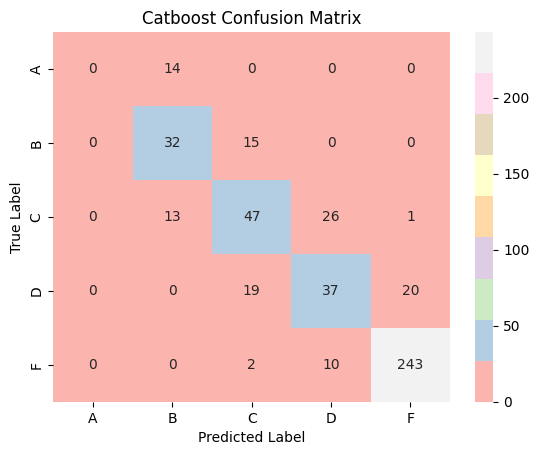

In [ ]:
catboostMatrix = confusion_matrix(ytest,
                                  ypred_catboost)

sns.heatmap(catboostMatrix,
            annot = True,
            fmt = "d",
            cmap = "Pastel1",
            xticklabels = catboost_model.classes_,
            yticklabels = catboost_model.classes_)

plt.title("Catboost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

The confusion matrix above shows that the CatBoost model predicts the *GradeClass* pretty well, since the true values (359) are much higher than the false ones (120). However, the model fails to predict all of the A class, indicating that the model is not that good. This confusion matrix also supports the analysis of the classification report displayed before.

**XGBoost**

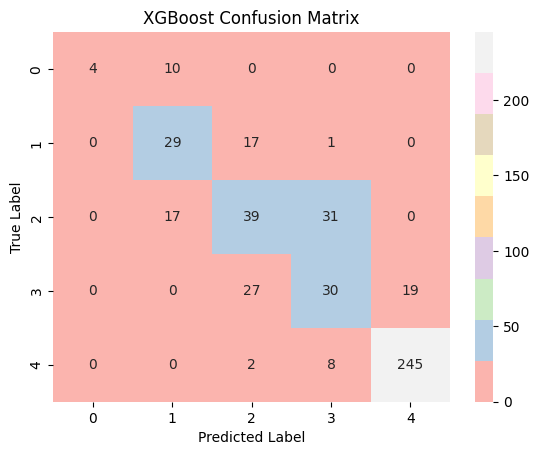

In [ ]:
xgboostMatrix = confusion_matrix(ytest_encoded,
                                 ypred_xgboost)

sns.heatmap(xgboostMatrix,
            annot = True,
            fmt = "d",
            cmap = "Pastel1",
            xticklabels = xgboost_model.classes_,
            yticklabels = xgboost_model.classes_)

plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

The confusion matrix above also shows that the XGBoost model predicts the *GradeClass* pretty well, since the true values (347) are much higher than the false ones (132). However, similar to the CatBoost model, the XGBoost model predicts less than 50% of the class A, which is bad. This confusion matrix also supports the analysis of the classification report displayed before.

As a result, both of the confusion matrices show that although the model performances are not that good, their prediction still variates around the true *GradeClass* (there are no predicted class C on class A, etc).

### **Hyperparameter Fine Tuning**

**CatBoost**

In [ ]:
catboost_hyperparameters = {
    "depth": list(range(2,10,2)),
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.6, 0.8],
    "iterations": list(range(10,50,10))
}

catboost_finetune = CatBoostClassifier()

grid_catboost = GridSearchCV(estimator = catboost_finetune,
                             param_grid = catboost_hyperparameters,
                             cv = 2,
                             n_jobs = -1)
grid_catboost.fit(xtrain, ytrain)

print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n", grid_catboost.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_catboost.best_params_)

0:	learn: 0.8648847	total: 2.82ms	remaining: 110ms
1:	learn: 0.6998841	total: 5.88ms	remaining: 112ms
2:	learn: 0.5971763	total: 7.86ms	remaining: 97ms
3:	learn: 0.5808406	total: 9.59ms	remaining: 86.3ms
4:	learn: 0.5473052	total: 12.1ms	remaining: 84.7ms
5:	learn: 0.5149185	total: 14.3ms	remaining: 80.9ms
6:	learn: 0.5080514	total: 15.9ms	remaining: 75ms
7:	learn: 0.4917865	total: 18.3ms	remaining: 73.2ms
8:	learn: 0.4738822	total: 21.3ms	remaining: 73.3ms
9:	learn: 0.4530049	total: 23.9ms	remaining: 71.7ms
10:	learn: 0.4388328	total: 26.2ms	remaining: 69ms
11:	learn: 0.4201157	total: 28.5ms	remaining: 66.4ms
12:	learn: 0.4155414	total: 30.6ms	remaining: 63.6ms
13:	learn: 0.4052055	total: 33.1ms	remaining: 61.6ms
14:	learn: 0.3954446	total: 35.7ms	remaining: 59.5ms
15:	learn: 0.3900315	total: 38.5ms	remaining: 57.7ms
16:	learn: 0.3856010	total: 41.3ms	remaining: 55.9ms
17:	learn: 0.3785976	total: 43.5ms	remaining: 53.2ms
18:	learn: 0.3699931	total: 45.7ms	remaining: 50.5ms
19:	learn: 

Based on the hyperparameter fine tuning, the best parameters for the CatBoost Model are:  
- depth: **4**
- iterations: **40**
- learning_rate: **0.8**  

with the best score: 0.79.

**XGBoost**

In [ ]:
xgboost_hyperparameters = {
    "eval_metric": ["logloss"],
    "max_depth": list(range(2,10,2)),
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.6, 0.8],
    "n_estimators": [25, 50, 100, 200]
}

xgboost_finetune = XGBClassifier()

grid_xgboost = GridSearchCV(estimator = xgboost_finetune,
                           param_grid = xgboost_hyperparameters,
                           cv = 2,
                           n_jobs = -1)
grid_xgboost.fit(xtrain, ytrain_encoded)

print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n", grid_xgboost.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_xgboost.best_params_)

 Results from Grid Search 

 The best score across ALL searched params:
 0.7757451152704363

 The best parameters across ALL searched params:
 {'eval_metric': 'logloss', 'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 100}


Based on the hyperparameter fine tuning, the best parameters for the CatBoost Model are:  
- eval_metric: "**logloss**"
- learning_rate: **0.3**
- max_depth: **2**
- n_estimators: **100**

with the best score: 0.78.

#### **Hyperparameter Fine Tuning Evaluation**

**CatBoost**

0:	learn: 0.8648847	total: 5.32ms	remaining: 207ms
1:	learn: 0.6998841	total: 9.88ms	remaining: 188ms
2:	learn: 0.5971763	total: 13.9ms	remaining: 172ms
3:	learn: 0.5808406	total: 19ms	remaining: 171ms
4:	learn: 0.5473052	total: 22.1ms	remaining: 155ms
5:	learn: 0.5149185	total: 26.5ms	remaining: 150ms
6:	learn: 0.5080514	total: 31.6ms	remaining: 149ms
7:	learn: 0.4917865	total: 35.2ms	remaining: 141ms
8:	learn: 0.4738822	total: 39.8ms	remaining: 137ms
9:	learn: 0.4530049	total: 42.9ms	remaining: 129ms
10:	learn: 0.4388328	total: 47.2ms	remaining: 124ms
11:	learn: 0.4201157	total: 50.9ms	remaining: 119ms
12:	learn: 0.4155414	total: 63.8ms	remaining: 133ms
13:	learn: 0.4052055	total: 69.5ms	remaining: 129ms
14:	learn: 0.3954446	total: 73.1ms	remaining: 122ms
15:	learn: 0.3900315	total: 80ms	remaining: 120ms
16:	learn: 0.3856010	total: 82.3ms	remaining: 111ms
17:	learn: 0.3785976	total: 84.1ms	remaining: 103ms
18:	learn: 0.3699931	total: 86.2ms	remaining: 95.3ms
19:	learn: 0.3632504	tota

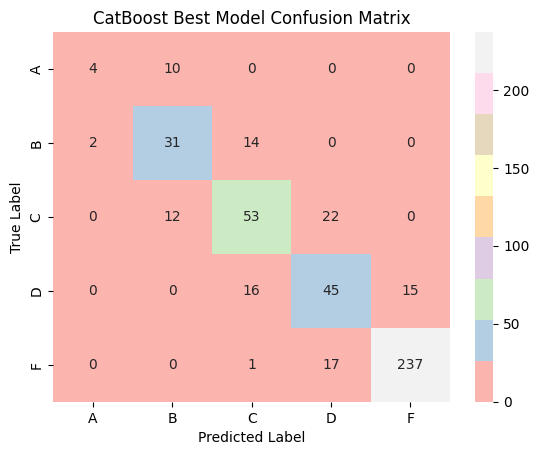

In [ ]:
catboost_bestmodel = grid_catboost.best_estimator_
catboost_bestmodel.fit(xtrain,
                       ytrain)

ypred_catboost_best = catboost_bestmodel.predict(xtest)
yprob_catboost_best = catboost_bestmodel.predict_proba(xtest)[:, 1]

print(classification_report(ytest,
                            y_pred = ypred_catboost_best))

catboostMatrix_best = confusion_matrix(ytest,
                                    ypred_catboost_best)

sns.heatmap(catboostMatrix_best,
            annot = True,
            fmt = "d",
            cmap = "Pastel1",
            xticklabels = catboost_bestmodel.classes_,
            yticklabels = catboost_bestmodel.classes_)

plt.title("CatBoost Best Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

Based on the classification report above, the overall accuracy score of the CatBoost model after fine tuning is 77%, supported by the precision score (67%), recall score (62%), and f1-score (63%), indicating that this CatBoost model is pretty good at predicting student's *GradeClass*, much better than the pre-finetuned model.  
The precision score shows that 67% of the predicted positive values are truly positive, while the recall score shows that 62% of the positive values are actually predicted as positives. As a result, the F1-score shows the balanced calculation of the precision and recall scores, showing that the model's performance is pretty bad (63%).  
Additionally, the confusion matrix also shows that the model is really good at its prediction, especially for class F.

**XGBoost**

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.61      0.64      0.62        47
           2       0.64      0.54      0.58        87
           3       0.52      0.58      0.55        76
           4       0.93      0.95      0.94       255

    accuracy                           0.77       479
   macro avg       0.67      0.65      0.66       479
weighted avg       0.77      0.77      0.77       479



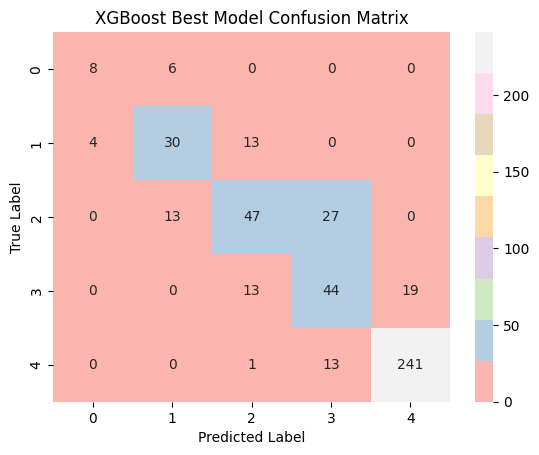

In [ ]:
xgboost_bestmodel = grid_xgboost.best_estimator_
xgboost_bestmodel.fit(xtrain,
                      ytrain_encoded)

ypred_xgboost_best = xgboost_bestmodel.predict(xtest)
yprob_xgboost_best = xgboost_bestmodel.predict_proba(xtest)[:, 1]

print(classification_report(ytest_encoded,
                            y_pred = ypred_xgboost_best))

xgboostMatrix_best = confusion_matrix(ytest_encoded,
                                      ypred_xgboost_best)

sns.heatmap(xgboostMatrix_best,
            annot = True,
            fmt = "d",
            cmap = "Pastel1",
            xticklabels = xgboost_bestmodel.classes_,
            yticklabels = xgboost_bestmodel.classes_)

plt.title("XGBoost Best Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

Based on the classification report above, the overall accuracy score of the XGBoost model is 77%, supported by the precision score (67%), recall score (65%), and f1-score (66%), indicating that this XGBoost model is also pretty good at predicting student's *GradeClass*, better than the pre-finetuned model and the finetuned CatBoost model.  
The precision score shows that 67% of the predicted positive values are truly positive, while the recall score shows that 65% of the positive values are actually predicted as positives. As a result, the F1-score shows the balanced calculation of the precision and recall scores, showing that the model's performance is pretty bad (66%).  
Additionally, the confusion matrix also shows that the model is fairly good to predict the *GradeClass*. However, the prediction of class 2 and 3 is rather balanced, so the model doesn't really predict the class 2 well.